In [13]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms


creator.create("FitnessMax", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

popSize = 24  # Population size
dimension = 3  # Number of decision variables
numOfBits = 10  # Number of bits in the chromosomes
iterations = 100  # Number of generations to be run
dspInterval = 10
nElitists = 2  # Number of elite individuals selected
crossProb = 0.6
flipProb = 1. / (dimension * numOfBits)  # Bit mutate probability
mutateProb = 0.1  # Mutation probability
maxnum = 2 ** numOfBits  # Absolute max size of number coded by binary list 1,0,0,1,1,...

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, numOfBits * dimension)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# Fitness function: sphere model
def eval_sphere(individual):
    sep = separate_variables(individual)
    f1 = ((sep[0] - 0.6) / 1.6) ** 2 + (sep[1] / 3.4) ** 2 + (sep[2] - 1.3) ** 2 / 2.0
    f2 = (sep[0] / 1.9 - 2.3) ** 2 + (sep[1] / 3.3 - 7.1) ** 2 + (sep[2] + 4.3) ** 2 / 3.0
    return 1.0 / (0.01 + f1), 1.0 / (0.01 + f2),


# Operator registration
toolbox.register("evaluate", eval_sphere)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selRoulette, fit_attr='fitness')


# Convert binary chromosome to real number
def chrom2real(c):
    ind_as_string = ''.join(map(str, c))
    degray = gray_to_bin(ind_as_string)
    num_as_int = int(degray, 2)
    num_in_range = -4 + 8 * num_as_int / (2 ** numOfBits)
    return num_in_range


# Convert concatenated list of binary variables to tuple of real numbers representing those variables
def separate_variables(v):
    return chrom2real(v[:numOfBits]), chrom2real(v[numOfBits:numOfBits * 2]), chrom2real(v[numOfBits * 2:])


def main():
    pop = toolbox.population(n=popSize)

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    print("  Evaluated %i individuals" % len(pop))

    g = 0  # Generation counter

    # Begin the evolution
    while g < iterations:
        g = g + 1
        print("-- Generation %i --" % g)

        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop, len(pop) - nElitists)
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossProb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutateProb:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # The population is entirely replaced by the offspring
        pop[:] = offspring

        if g % dspInterval == 0:
            fits = [ind.fitness.values[0] for ind in pop]
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x * x for x in fits)
            std = abs(sum2 / length - mean ** 2) ** 0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)

    print("-- End of (successful) evolution --")

    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    print("Decoded variables are x1=%s, x2=%s, x3=%s" % separate_variables(best_ind))


if __name__ == "__main__":
    main()


  Evaluated 24 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 0.06318459795888486
  Max 3.9256975825207383
  Avg 2.6252990158926877
  Std 0.8796634589714524
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 0.06554643513252474
  Max 4.916807187729429
  Avg 3.0862481363525855
  Std 1.2784257210768033
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 0.06945817637585548
  Max 5.038459304810678
  Avg 3.9260424016763156
  Std 1.6049449887466631
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-

gen	evals	std	min                    	avg	max                    
0  	24   	   	[0.16666667 0.02083333]	   	[9.02083333 3.        ]
1  	24   	   	[0.16666667 0.02083333]	   	[5.10416667 3.        ]
2  	24   	   	[0.         0.02083333]	   	[5.10416667 4.        ]
3  	24   	   	[0. 0.]                	   	[4.35416667 4.        ]
4  	24   	   	[0. 0.]                	   	[4. 4.]                
5  	24   	   	[0. 0.]                	   	[4. 4.]                
6  	24   	   	[0. 0.]                	   	[4. 4.]                
7  	24   	   	[0. 0.]                	   	[4. 4.]                
8  	24   	   	[0. 0.]                	   	[4. 4.]                
9  	24   	   	[0. 0.]                	   	[4. 4.]                
10 	24   	   	[0. 0.]                	   	[4. 4.]                
11 	24   	   	[0. 0.]                	   	[4. 4.]                
12 	24   	   	[0. 0.]                	   	[4. 4.]                
13 	24   	   	[0. 0.]                	   	[4. 4.]                
14 	24   	

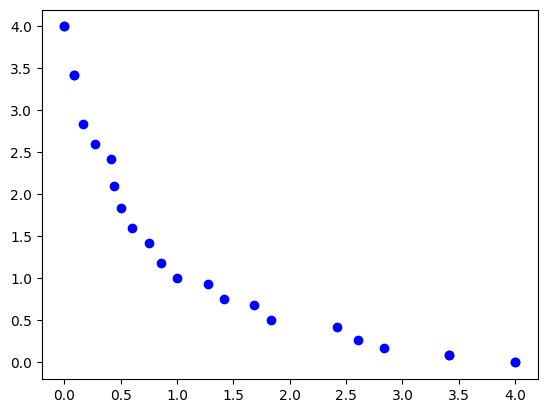

6 3 1
0 1 1
3 2 1
2 1 0
7 2 1
4 2 1
6 3 1
8 3 2
7 2 1
8 3 2


In [25]:
# This file is part of DEAP.
# This implements the NSGA-II in an easy way because it makes us of DEAP subroutines
# The non dominated sort and crowding distance are solved by a simiple call to DEAP subroutines
# and their implementation is hidden.
#
# DEAP is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as
# published by the Free Software Foundation, either version 3 of
# the License, or (at your option) any later version.
#
# DEAP is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public
# License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

import array
import random
import json

import numpy

from math import sqrt

from deap import algorithms
from deap import base
from deap import benchmarks
from deap.benchmarks.tools import diversity, convergence, hypervolume
from deap import creator
from deap import tools
import matplotlib.pyplot as plt

creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

def calcFitness(individual):
    # x1 in [1, 2,�, 16]; x2 in [1, 2,�, 8]; x3 in [1, 2, 3, 4]
    #        4 bits              3 bits             2 bits
    x1 = individual[0:4]
    x2 = individual[4:7]
    x3 = individual[7:9]
    x1 = int("".join(str(i) for i in x1), 2)
    x2 = int("".join(str(i) for i in x2), 2)
    x3 = int("".join(str(i) for i in x3), 2)
    f1 = ((x1/4.0)**2 + (x2/2.0)**2 + x3**2.0) / 3.0
    f2 = ((x1/4.0-2.0)**2 + (x2/2.0-2.0)**2 + (x3-2.0)**2.0) / 3.0
    return f1, f2    
    
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 9)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", calcFitness)
toolbox.register("mate", tools.cxTwoPoint)
flipProb = 1.0 / 9
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selNSGA2)

def main(seed=None):
    random.seed(seed)

    NGEN = 100
    MU = 24
    CXPB = 0.9

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
    
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    pop = toolbox.population(n=MU)
    
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in pop if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # This is just to assign the crowding distance to the individuals
    # no actual selection is done
    pop = toolbox.select(pop, len(pop))
    
    record = stats.compile(pop)
    logbook.record(gen=0, evals=len(invalid_ind), **record)
    print(logbook.stream)

    # Begin the generational process
    for gen in range(1, NGEN):
        # Vary the population
        offspring = tools.selTournamentDCD(pop, len(pop))
        # selTournamentDCD means Tournament selection based on dominance (D) 
        # followed by crowding distance (CD). This selection requires the 
        # individuals to have a crowding_dist attribute
        offspring = [toolbox.clone(ind) for ind in offspring]
        
        for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
        #make pairs of all (even,odd) in offspring
            if random.random() <= CXPB:
                toolbox.mate(ind1, ind2)
            
            toolbox.mutate(ind1)
            toolbox.mutate(ind2)
            del ind1.fitness.values, ind2.fitness.values
        
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation population
        pop = toolbox.select(pop + offspring, MU)
        record = stats.compile(pop)
        logbook.record(gen=gen, evals=len(invalid_ind), **record)
        print(logbook.stream)

    print("Final population hypervolume is %f" % hypervolume(pop, [11.0, 11.0]))

    return pop, logbook
        
if __name__ == "__main__":
    pop, stats = main()
    pop.sort(key=lambda x: x.fitness.values)
    
    front = numpy.array([ind.fitness.values for ind in pop])
    plt.scatter(front[:,0], front[:,1], c="b")
    plt.axis("tight")
    plt.show()
    
    # print some individuals
    for n in range(10):
        i=pop[random.choice(range(0, len(pop)))]
        x1=i[0:4]
        x2=i[4:7]
        x3=i[7:9]
        x1= int("".join(str(i) for i in x1),2)
        x2= int("".join(str(i) for i in x2),2)
        x3= int("".join(str(i) for i in x3),2)
        print(x1,x2,x3)
